In [14]:
folder = r'D:\Tài liệu học tập\UEH\Năm 3\HKC - 2024\Lập trình phân tích dữ liệu\Đồ án'

In [15]:
# Các thư viện
import pandas as pd
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
# df_node = pd.read_excel(file_name,sheet_name='Nodes')
df_edge = pd.read_csv(folder + '/Graph.csv')
df_edge.head()

,v_from,v_to,weight
0,v1,v2,4
1,v1,v3,9
2,v1,v4,5
3,v2,v5,15
4,v2,v6,2


In [17]:
class Node:
    def __init__(self, name, par=None, dist=float('inf')):
        self.name = name        # Tên hoặc định danh của node
        self.par = par          # Node cha (để truy vết lại đường đi)
        self.dist = dist        # Khoảng cách từ node nguồn đến node hiện tại

In [18]:
class Graph:
    def __init__(self):
        self.graph = {}  # Sử dụng dictionary để lưu trữ đồ thị

        # Thêm các node vào đồ thị
    def add_node(self, node):
        self.graph[node.name] = node

    def add_edge(self, u, v, weight):
        # Thêm cạnh từ u đến v với trọng số weight
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append((v, weight))

        # Đồ thị vô hướng, thêm cạnh ngược lại
        if v not in self.graph:
            self.graph[v] = []
        self.graph[v].append((u, weight))

    def get_neighbors(self, node):
        # Lấy danh sách các đỉnh kề với node
        return self.graph.get(node)

    def display(self):
        # Hiện thị graph
        for node, neighbors in self.graph.items():
            print(f"{node}: {neighbors}")

In [19]:
class Dijkstra:
    def __init__(self, graph):
        self.graph = graph

    def shortest_path(self, start):
        distances = {node: float('inf') for node in self.graph.graph}
        distances[start] = 0

        priority_queue = [(0, start)]
        visited = set()
        parents = {node: None for node in self.graph.graph}  # Lưu trữ cha của mỗi node

        while priority_queue:
            current_distance, current_node = heapq.heappop(priority_queue)

            if current_node in visited:
                continue

            visited.add(current_node)

            for neighbor, weight in self.graph.get_neighbors(current_node):
                distance = current_distance + weight

                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    parents[neighbor] = current_node  # Cập nhật cha
                    heapq.heappush(priority_queue, (distance, neighbor))

        return distances, parents  # Trả về cả distances và parents

In [20]:
def get_path(parents, target):
      path = []
      while target is not None:
          path.append(target)
          target = parents[target]
      path.reverse()
      return path

In [42]:
class GraphVisualizer:
    def __init__(self, graph):
        """Initialize the visualizer with the graph structure."""
        self.graph = graph

    def visualize(self, path=None):
        """Display the graph and optionally highlight a path."""
        G = nx.Graph()
        for v_from in self.graph:
            for v_to, weight in self.graph[v_from]:
                G.add_edge(v_from, v_to, weight=weight)

        position = nx.spring_layout(G, seed = 42)
        plt.figure(figsize=(7, 7))

        # Draw nodes and edges
        node_color = [(0.77, 0.69, 1)] * len(G.nodes)
        nx.draw_networkx_nodes(G, position, node_size=400, node_color=node_color)
        nx.draw_networkx_edges(G, position, edgelist=G.edges(), width=1, alpha=0.5)
        edge_labels = {(v_to, v_from): d['weight'] for v_to, v_from, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        # Draw labels
        nx.draw_networkx_labels(G, position, font_size=12, font_color=(0.07, 0, 0.62))

        # Highlight path if given
        if path:
            path_edges = list(zip(path, path[1:]))
            edges_color = [(0.29, 0.26, 0.89)] * len(G.edges)
            nx.draw_networkx_edges(G, position, edgelist=path_edges, width=3, edge_color=edges_color, arrows=True, arrowstyle= '-|>')
            nx.draw_networkx_edge_labels(G, position, edge_labels=edge_labels, font_size=10)

        plt.title('Đồ thị' + (' với đường đi ngắn nhất được tô màu' if path else ''))
        plt.show()

In [43]:
graph = Graph()

for index, row in df_edge.iterrows():
    graph.add_edge(row['v_from'], row['v_to'], row['weight'])

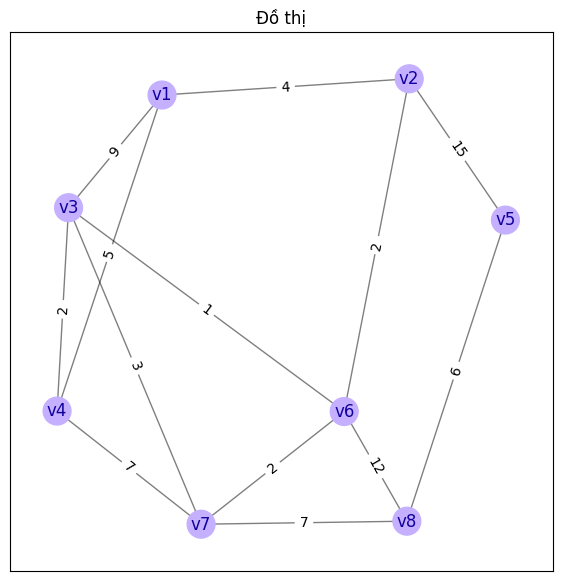

In [44]:
visualizer = GraphVisualizer(graph.graph)
visualizer.visualize(path=None)

In [37]:
dijkstra = Dijkstra(graph)

# Tìm đường đi ngắn nhất từ v1
shortest_paths, parents = dijkstra.shortest_path('v1')

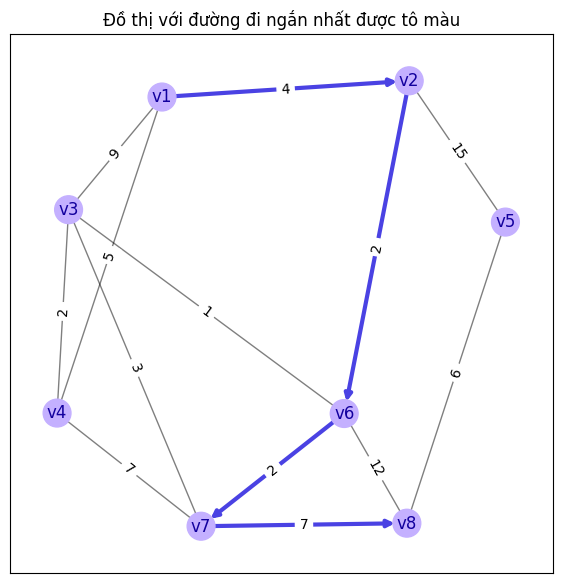

Chi phí đi từ A đến v8: 15
Đường đi: v1 -> v2 -> v6 -> v7 -> v8


In [38]:
# In kết quả
for node in shortest_paths:
    path = get_path(parents, node)  # Get the actual path (list of nodes)
    if node == 'v8':
        visualizer = GraphVisualizer(graph.graph)
        visualizer.visualize(path=path)  # Pass the path (list of nodes)
        print(f'Chi phí đi từ A đến {node}: {shortest_paths[node]}\nĐường đi: {" -> ".join(path)}')